## Case Study: bagetid.dk!

## Artifect 3: Business Problem and Modelling Presentation 

**Student Name:** Seng San

**Student ID:** 218640649

## Table of Content
   
1. [Executive Summary](#cell_summary)


2. [Loading Dataset](#cell_loading)


3. [Exploring Dataset](#cell_exploring)


4. [Hypothesis Development](#cell_hypo)

 
5. [Data Transformation](#cell_transform)

<a id = "cell_summary"></a>
### 1. Executive Summary

**_bagetid.dk_** is a specialty retail online store based out of Denmark. Its main products are focused on food products. They sell ingredients and other required equipments for preparing desserts, baking cakes, etc. (Om os, 2020). The company is recently acquired by a German food products giant, Dr. Oetker in 2019. 

#### Problem Statement 

By utilizing its transactional data, **_bagetid.dk_** would like to identify the **_Locomotive Products_** and the **_Wagon Products_**. 

- **_Locomotive Products_** are the products which generate the highest additional sales. The **_Locomotive Products_** generally encourage/push/trigger customers to purchase other products after having bought these **_Locomotive Products_**.

- **_Wagon Products_** are the products that come along with the **_Locomotive Products_** and are pushed by the purchases of **_Locomotive Products_**.

#### Methods and Algorithms

In order to solve this problem, two important algorithms will be used: Apriori Algorithm and Association Rule. 

<a id = "cell_loading"></a>
### 2. Loading Dataset

#### Import Packages
We start by importing some neccessary packages, which will be needed to address the above problem statement. 

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

#### Load Dataset
We save our dataset from client into **_data.csv_**. Then, we load this dataset and view its first 5 rows.

In [100]:
import os
path = 'E:\Deakin Data'
os.chdir(path)

In [101]:
import io
df = pd.read_csv('DataDeakin.csv',encoding = 'latin-1')

#df_orig = pd.read_csv('Clean_Data.csv', parse_dates=True)
#df_orig.head()

C:\Users\bnb\A3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,10,29,42,44,48,51,52,57,66,69) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [102]:
df

,ORDER_ID,ORDER_DATE,ORDER_DATE_SEND,ORDER_DATE_UPDATED,ORDER_CURRENCY,ORDER_STATUS,ORDER_REFERENCE_NR,ORDER_VAT,ORDER_TOTAL,ORDER_COMMENT,...,CUSTOMER_SHIPPING_ADDRESS2,CUSTOMER_SHIPPING_POSTCODE,CUSTOMER_SHIPPING_CITY,CUSTOMER_SHIPPING_COUNTRY,CUSTOMER_SHIPPING_COUNTRY_ID,CUSTOMER_SHIPPING_COUNTRY_CODE,CUSTOMER_SHIPPING_PHONE,CUSTOMER_SHIPPING_MOBILE,CUSTOMER_SHIPPING_EMAIL,DELIVERY_DROPPOINT_ID
0,103604,7/1/2018 0:30,7/2/2018 15:02,7/2/2018 15:02,DKK,3,NaN,0.25,198.90,NaN,...,Pakkeshop: 97213,4100.0,Ringsted,DK,0,45.0,NaN,NaN,NaN,97213.0
1,103604,7/1/2018 0:30,7/2/2018 15:02,7/2/2018 15:02,DKK,3,NaN,0.25,198.90,NaN,...,Pakkeshop: 97213,4100.0,Ringsted,DK,0,45.0,NaN,NaN,NaN,97213.0
2,103605,7/1/2018 6:45,7/2/2018 15:02,7/2/2018 15:02,DKK,3,NaN,0.25,523.50,NaN,...,Pakkeshop: 99359,4220.0,Korsør,DK,0,45.0,NaN,NaN,NaN,99359.0
3,103605,7/1/2018 6:45,7/2/2018 15:02,7/2/2018 15:02,DKK,3,NaN,0.25,523.50,NaN,...,Pakkeshop: 99359,4220.0,Korsør,DK,0,45.0,NaN,NaN,NaN,99359.0
4,103605,7/1/2018 6:45,7/2/2018 15:02,7/2/2018 15:02,DKK,3,NaN,0.25,523.50,NaN,...,Pakkeshop: 99359,4220.0,Korsør,DK,0,45.0,NaN,NaN,NaN,99359.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178982,157947,6/30/2020 23:19,7/1/2020 14:01,7/1/2020 14:01,DKK,3,NaN,0.25,334.90,NaN,...,Pakkeshop: 95041,4270.0,Høng,DK,0,45.0,NaN,NaN,NaN,95041.0
178983,157947,6/30/2020 23:19,7/1/2020 14:01,7/1/2020 14:01,DKK,3,NaN,0.25,334.90,NaN,...,Pakkeshop: 95041,4270.0,Høng,DK,0,45.0,NaN,NaN,NaN,95041.0
178984,157947,6/30/2020 23:19,7/1/2020 14:01,7/1/2020 14:01,DKK,3,NaN,0.25,334.90,NaN,...,Pakkeshop: 95041,4270.0,Høng,DK,0,45.0,NaN,NaN,NaN,95041.0
178985,157949,6/30/2020 23:34,7/1/2020 7:51,7/1/2020 7:51,DKK,3,NaN,0.25,400.00,NaN,...,NaN,NaN,NaN,NaN,0,45.0,NaN,NaN,NaN,NaN


In [103]:
df = df[df.columns[df.isnull().sum() < 1000]]
df.isnull().sum()

ORDER_ID                            0
ORDER_DATE                          0
ORDER_DATE_SEND                     0
ORDER_DATE_UPDATED                  0
ORDER_CURRENCY                      0
ORDER_STATUS                        0
ORDER_VAT                           0
ORDER_TOTAL                         0
ORDER_ORIGIN                        0
ORDER_SITE_ID                       0
ORDER_LANGUAGE_ID                   0
PAYMENT_TITLE                       0
PAYMENT_PRICE                      43
PAYMENT_TRANSACTION               809
PAYMENT_CARD_TYPE                 809
DELIVERY_TITLE                     69
DELIVERY_PRICE                      0
DELIVERY_PRICE_NO_VAT               0
PRODUCT_ID                         60
PRODUCT_NUMBER                    659
PRODUCT_AMOUNT                      1
PRODUCT_PRICE                       1
PRODUCT_DISCOUNT                   61
STOCK_LOCATION_ID                   1
PRODUCT_STOCK_STATUS              685
PRODUCT_WEIGHT                     61
PRODUCT_UNIT

In [104]:
cols = [2,3,5,8,9,10,11,12,13,14,15,19,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39]
df = df.drop(df.columns[cols],axis=1)
df

,ORDER_ID,ORDER_DATE,ORDER_CURRENCY,ORDER_VAT,ORDER_TOTAL,DELIVERY_PRICE,DELIVERY_PRICE_NO_VAT,PRODUCT_ID,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_DISCOUNT
0,103604,7/1/2018 0:30,DKK,0.25,198.90,39.00,31.20,524.0,1.0,47.96,0.00
1,103604,7/1/2018 0:30,DKK,0.25,198.90,39.00,31.20,3999.0,1.0,120.00,40.04
2,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,2194.0,1.0,103.96,0.00
3,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,3914.0,1.0,27.96,0.00
4,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,3133.0,8.0,31.96,0.00
...,...,...,...,...,...,...,...,...,...,...,...
178982,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,3569.0,1.0,52.00,0.00
178983,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,3568.0,1.0,52.00,0.00
178984,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,362.0,1.0,79.96,0.00
178985,157949,6/30/2020 23:34,DKK,0.25,400.00,0.00,0.00,3610.0,1.0,320.00,0.00


In [105]:
df['PRODUCT_DISCOUNT'] = df['PRODUCT_DISCOUNT'].fillna(0.0).astype(int)
df['PRODUCT_ID'] = df['PRODUCT_ID'].fillna(0.0).astype(int)
df

,ORDER_ID,ORDER_DATE,ORDER_CURRENCY,ORDER_VAT,ORDER_TOTAL,DELIVERY_PRICE,DELIVERY_PRICE_NO_VAT,PRODUCT_ID,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_DISCOUNT
0,103604,7/1/2018 0:30,DKK,0.25,198.90,39.00,31.20,524,1.0,47.96,0
1,103604,7/1/2018 0:30,DKK,0.25,198.90,39.00,31.20,3999,1.0,120.00,40
2,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,2194,1.0,103.96,0
3,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,3914,1.0,27.96,0
4,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,3133,8.0,31.96,0
...,...,...,...,...,...,...,...,...,...,...,...
178982,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,3569,1.0,52.00,0
178983,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,3568,1.0,52.00,0
178984,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,362,1.0,79.96,0
178985,157949,6/30/2020 23:34,DKK,0.25,400.00,0.00,0.00,3610,1.0,320.00,0


In [106]:
df = df.dropna()
df


,ORDER_ID,ORDER_DATE,ORDER_CURRENCY,ORDER_VAT,ORDER_TOTAL,DELIVERY_PRICE,DELIVERY_PRICE_NO_VAT,PRODUCT_ID,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_DISCOUNT
0,103604,7/1/2018 0:30,DKK,0.25,198.90,39.00,31.20,524,1.0,47.96,0
1,103604,7/1/2018 0:30,DKK,0.25,198.90,39.00,31.20,3999,1.0,120.00,40
2,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,2194,1.0,103.96,0
3,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,3914,1.0,27.96,0
4,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,3133,8.0,31.96,0
...,...,...,...,...,...,...,...,...,...,...,...
178982,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,3569,1.0,52.00,0
178983,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,3568,1.0,52.00,0
178984,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,362,1.0,79.96,0
178985,157949,6/30/2020 23:34,DKK,0.25,400.00,0.00,0.00,3610,1.0,320.00,0


#### View columns, Null values and drop un-needed columns
We view all the available columns in the dataset, then remove the un-needed columns. 

In [107]:
df['PRODUCT_AMOUNT']=df['PRODUCT_AMOUNT'].astype('str')
df['PRODUCT_AMOUNT']=df['PRODUCT_AMOUNT'].str.replace('-','')
df['PRODUCT_AMOUNT']=df['PRODUCT_AMOUNT'].astype('float')
df


C:\Users\bnb\A3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\bnb\A3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\bnb\A3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

,ORDER_ID,ORDER_DATE,ORDER_CURRENCY,ORDER_VAT,ORDER_TOTAL,DELIVERY_PRICE,DELIVERY_PRICE_NO_VAT,PRODUCT_ID,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_DISCOUNT
0,103604,7/1/2018 0:30,DKK,0.25,198.90,39.00,31.20,524,1.0,47.96,0
1,103604,7/1/2018 0:30,DKK,0.25,198.90,39.00,31.20,3999,1.0,120.00,40
2,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,2194,1.0,103.96,0
3,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,3914,1.0,27.96,0
4,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,3133,8.0,31.96,0
...,...,...,...,...,...,...,...,...,...,...,...
178982,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,3569,1.0,52.00,0
178983,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,3568,1.0,52.00,0
178984,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,362,1.0,79.96,0
178985,157949,6/30/2020 23:34,DKK,0.25,400.00,0.00,0.00,3610,1.0,320.00,0


In [108]:
df.isna().sum()

ORDER_ID                 0
ORDER_DATE               0
ORDER_CURRENCY           0
ORDER_VAT                0
ORDER_TOTAL              0
DELIVERY_PRICE           0
DELIVERY_PRICE_NO_VAT    0
PRODUCT_ID               0
PRODUCT_AMOUNT           0
PRODUCT_PRICE            0
PRODUCT_DISCOUNT         0
dtype: int64

In [109]:
df['PRODUCT_SALE'] = df['PRODUCT_PRICE']*df['PRODUCT_AMOUNT']
df

C:\Users\bnb\A3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,ORDER_ID,ORDER_DATE,ORDER_CURRENCY,ORDER_VAT,ORDER_TOTAL,DELIVERY_PRICE,DELIVERY_PRICE_NO_VAT,PRODUCT_ID,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_DISCOUNT,PRODUCT_SALE
0,103604,7/1/2018 0:30,DKK,0.25,198.90,39.00,31.20,524,1.0,47.96,0,47.96
1,103604,7/1/2018 0:30,DKK,0.25,198.90,39.00,31.20,3999,1.0,120.00,40,120.00
2,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,2194,1.0,103.96,0,103.96
3,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,3914,1.0,27.96,0,27.96
4,103605,7/1/2018 6:45,DKK,0.25,523.50,39.00,31.20,3133,8.0,31.96,0,255.68
...,...,...,...,...,...,...,...,...,...,...,...,...
178982,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,3569,1.0,52.00,0,52.00
178983,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,3568,1.0,52.00,0,52.00
178984,157947,6/30/2020 23:19,DKK,0.25,334.90,39.95,31.96,362,1.0,79.96,0,79.96
178985,157949,6/30/2020 23:34,DKK,0.25,400.00,0.00,0.00,3610,1.0,320.00,0,320.00


In [110]:
#rows where product price or product amount or oder total is negative

df[df.PRODUCT_PRICE <0 ].count()

ORDER_ID                 600
ORDER_DATE               600
ORDER_CURRENCY           600
ORDER_VAT                600
ORDER_TOTAL              600
DELIVERY_PRICE           600
DELIVERY_PRICE_NO_VAT    600
PRODUCT_ID               600
PRODUCT_AMOUNT           600
PRODUCT_PRICE            600
PRODUCT_DISCOUNT         600
PRODUCT_SALE             600
dtype: int64

#### Drop unconsistent values
We drop all rows with negative values in **_PRODUCT_AMOUNT_** column. 

In [111]:
#check the shape of the dataframe
print(df.shape)

print(" -------------- ")

#drop rows with PRODUCT_PRICE is negative
df = df[(df.PRODUCT_PRICE >= 0)]

#check the shape of the dataframe
print(df.shape)

(178986, 12)
 -------------- 
(178386, 12)


In [112]:
df.describe()

,ORDER_ID,ORDER_VAT,ORDER_TOTAL,DELIVERY_PRICE,DELIVERY_PRICE_NO_VAT,PRODUCT_ID,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_DISCOUNT,PRODUCT_SALE
count,178386.00000,178386.000000,178386.000000,178386.000000,178386.000000,178386.000000,178386.000000,178386.000000,178386.000000,178386.000000
mean,131253.07079,0.249773,383.168871,28.869241,23.193894,2870.635358,1.347000,47.455320,1.163387,56.993360
std,15722.15121,0.007530,349.796538,22.496888,19.255671,1584.992286,2.969985,61.236371,9.085910,98.690025
min,103604.00000,0.000000,-1649.000000,-59.950000,-59.950000,13.000000,0.000000,0.000000,0.000000,0.000000
25%,117712.00000,0.250000,194.700000,0.000000,0.000000,1401.000000,1.000000,19.960000,0.000000,22.160000
50%,131683.00000,0.250000,308.550000,39.950000,31.960000,3205.500000,1.000000,27.960000,0.000000,32.000000
75%,144984.00000,0.250000,514.120000,39.950000,31.960000,4361.000000,1.000000,55.960000,0.000000,70.400000
max,157950.00000,0.250000,20000.000000,399.000000,399.000000,5600.000000,1000.000000,3996.000000,1598.000000,16000.000000


<a id = "cell_exploring"></a>
### 3. Exploring Dataset

#### Transaction & Product:
We first start by identifying the number of transactions and products sold in this store. 
These can be found by counting the unique **_ORDER_ID_** as well as **_PRODUCT_TITLE1_**. 

In [113]:
#count the total number of transactions (each transaction has a unique ORDER_ID) 
#cleaned data is 49463
df['ORDER_ID'].nunique()

50043

In [114]:
# Number of unique product id's are 3931
df['PRODUCT_ID'].nunique()

3934

#### Products per Transaction

Now we can discover the average number of items in a transaction. We can do this by grouping **ORDER_ID** then count the unique **PRODUCT_TITLE1** in each **ORDER_ID**. 

In [115]:
TRAN_PRODUCT = df.groupby('ORDER_ID').PRODUCT_ID.nunique()
TRAN_PRODUCT.describe()

count    50043.000000
mean         3.558520
std          3.027489
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         80.000000
Name: PRODUCT_ID, dtype: float64

It seemed like in average, there are around 3.5 items in a transaction. 50 percent of transactions have more than 3 items each and 25 percent of transactions contain more than 5 items each. 

The maximum number of items in a transaction is 79 and the minimum number of items in a transaction is 1. 

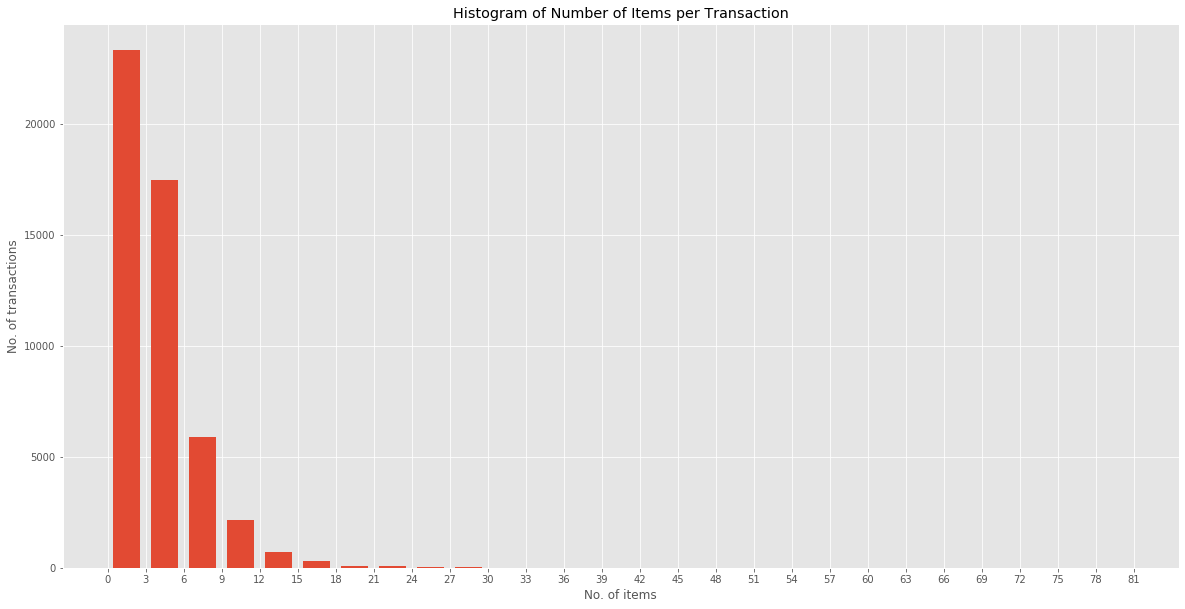

In [116]:
bins = list( range(0,84,3))

fig = plt.figure (figsize = (20,10))
style.use('ggplot')

ax1 = fig.add_subplot()
ax1.hist(TRAN_PRODUCT, bins, histtype = 'bar', rwidth = 0.7)
ax1.set_xticks(bins)

plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.title('Histogram of Number of Items per Transaction')
plt.show()


#### Value in DKK per Transaction

We can also discover the average amount of moeny paid in a transaction. We can do this by grouping **ORDER_ID** then caluculate the mean of **ORDER_TOTAL** in each **ORDER_ID**. 

In [117]:
TRAN_AMOUNT = df.groupby('ORDER_ID').ORDER_TOTAL.mean()
TRAN_AMOUNT.describe()

count    50043.000000
mean       275.971263
std        284.304975
min      -1649.000000
25%        138.900000
50%        213.850000
75%        339.950000
max      20000.000000
Name: ORDER_TOTAL, dtype: float64

It seemed like in average, the customers spend around 281 DKK in a transaction. 50 percent of transactions value more than 216 DKK each and 25 percent of transactions value more than 343 DKK each.  

And in general, the maximum spending in all transactions is 20,000 DKK and the minimum one is 1 DKK.  

#### Top Selling Products

**_Top Selling Products in term of Sale Value DKK_**


In order to find the top selling products, we will first find the sales value of each product, by creating a new column called **PRODUCT_SALE**. This new column is the multiplication of **PRODUCT_AMOUNT** and **PRODUCT_PRICE**. 

Then the top selling products can be found by grouping the **PRODUCT_SALE** by **PRODUCT_TITLE1** then sorting them in decensing order. 

C:\Users\bnb\A3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


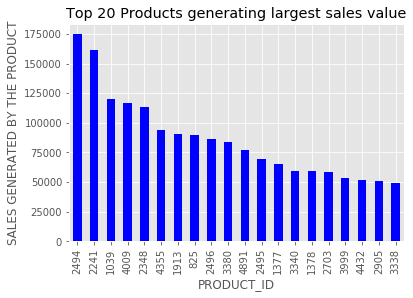

In [118]:
#create new column
df["PRODUCT_REVENUE"] = df["PRODUCT_AMOUNT"]*df["PRODUCT_PRICE"]

Product_Revenue = df.groupby("PRODUCT_ID").PRODUCT_REVENUE.sum()

#sort the product_sale in descensing order
Product_Revenue.sort_values(ascending = False, inplace = True)
Product_Revenue = Product_Revenue[:20]

#visualize the top 20 products
plt.set_title = ('Top 20 Products generating largest sales value')
plt.xlabel('PRODUCT ID')
plt.ylabel('SALES GENERATED BY THE PRODUCT')
Product_Revenue.iloc[:20].plot.bar(x='Product_Revenue',y='PRODUCT_ID',color='blue',title = 'Top 20 Products generating largest sales value')

**_Top Selling Products in term of quantity_**

Sometime the top selling products are not generally the top selling products in term of quantity, because here we don't consider the price of the products, we only care about its sale quantity in unit. 

This can be explored by adding all the **PRODUCT_AMOUNT** on each **PRODUCT_ID** which will be done by grouping the **PRODUCT_AMOUNT** and **PRODUCT_ID** by **PRODUCT_ID**. All the **PRODUCT_AMOUNT** of every **PRODUCT_ID** is added and then sorted in descensing order. 

In [119]:
unique_indexes = df.PRODUCT_ID.drop_duplicates().index
df[['PRODUCT_ID']].loc[unique_indexes]
ref_stock_desc= df[['PRODUCT_ID']].loc[unique_indexes]
ref_stock_desc.index= range(len(ref_stock_desc))


In [120]:
df_totalquantsold = df[['PRODUCT_ID','PRODUCT_AMOUNT']].groupby('PRODUCT_ID').sum()
df_totalquantsold.reset_index(inplace = True)
df_totalquantsold.sort_values(by= ['PRODUCT_AMOUNT'], ascending = False, inplace = True)
df_totalquantsold = df_totalquantsold.merge(ref_stock_desc, on ='PRODUCT_ID')
df_totalquantsold = df_totalquantsold.astype(int)
df_totalquantsold

,PRODUCT_ID,PRODUCT_AMOUNT
0,3380,5884
1,3378,3058
2,2241,2923
3,4632,2746
4,3379,2346
...,...,...
3929,729,1
3930,674,1
3931,5420,1
3932,1512,0


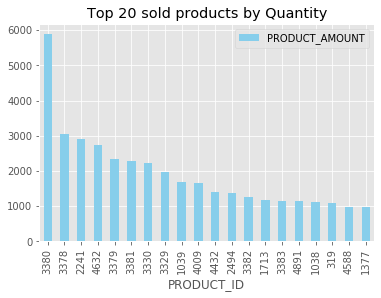

In [121]:
df_totalquantsold.iloc[:20].plot.bar(x='PRODUCT_ID',y='PRODUCT_AMOUNT',color= 'skyblue',title = 'Top 20 sold products by Quantity')

**_Top Discounting Products in term of frequency_**


In order to find the top discounting products, we will group the products by its title and count the number of its discount value. 

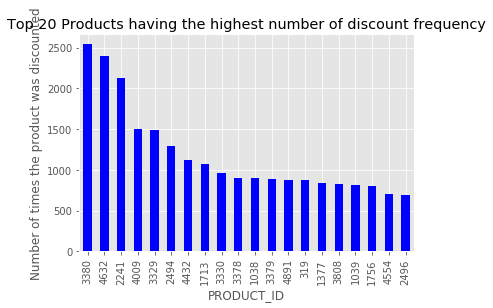

In [122]:
TopProduct_Discount = df.groupby("PRODUCT_ID").PRODUCT_DISCOUNT.count()

TopProduct_Discount.sort_values(ascending = False, inplace = True)
plt.set_title = ('Top 20 Products having the highest number of discount frequency')
plt.xlabel('PRODUCT ID')
plt.ylabel("Number of times the product was discounted")
TopProduct_Discount[:20].plot.bar(x='TopProduct_Discount',y='PRODUCT_ID',color='blue',title = 'Top 20 Products having the highest number of discount frequency')

**CORRELATION BETWEEN THE ATTRIBUTES**

The correlation coefficient is found out between the different integer attributes in order for us to determine the relationship between the different attributes. If the correlation coefficient is less than 0, it's a negative relationship and if the correlation coefficient is more than 0, it's a positive relationship.

In [124]:
corr = df[['PRODUCT_AMOUNT','PRODUCT_PRICE','PRODUCT_DISCOUNT','ORDER_TOTAL']].corr()
corr.style.background_gradient(cmap='RdBu_r').set_precision(2)

,PRODUCT_AMOUNT,PRODUCT_PRICE,PRODUCT_DISCOUNT,ORDER_TOTAL
PRODUCT_AMOUNT,1.00,-0.04,-0.01,0.18
PRODUCT_PRICE,-0.04,1.00,0.40,0.19
PRODUCT_DISCOUNT,-0.01,0.40,1.00,0.07
ORDER_TOTAL,0.18,0.19,0.07,1.00


**DATA PREPARATION**

In [125]:
df_set1 = df.groupby(['ORDER_ID', 'PRODUCT_ID'])['PRODUCT_AMOUNT'].sum().unstack().reset_index().fillna(0).set_index('ORDER_ID')
df_set1

PRODUCT_ID,13,16,18,19,20,21,22,23,24,25,...,5560,5562,5570,5573,5578,5579,5580,5589,5592,5600
ORDER_ID,,,,,,,,,,,,,,,,,,,,,
103604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
157947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
df_set2 = df.groupby(['ORDER_ID', 'PRODUCT_ID'])['PRODUCT_SALE'].sum().unstack().reset_index().fillna(0).set_index('ORDER_ID')
df_set2

PRODUCT_ID,13,16,18,19,20,21,22,23,24,25,...,5560,5562,5570,5573,5578,5579,5580,5589,5592,5600
ORDER_ID,,,,,,,,,,,,,,,,,,,,,
103604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
103605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
103606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
103607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
103608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
157946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,39.2,0.0,0.0,0.0,0.0,0.0,0.0,39.96,0.0,0.0
157947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [128]:
def encode(x):
    if x <= 0:
        return 0
    else:
        return 1       

In [129]:
df_set = df_set1.applymap(encode)
df_set

PRODUCT_ID,13,16,18,19,20,21,22,23,24,25,...,5560,5562,5570,5573,5578,5579,5580,5589,5592,5600
ORDER_ID,,,,,,,,,,,,,,,,,,,,,
103604,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103605,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103606,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103607,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103608,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157946,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
157947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**MARKET BASKET ANALYSIS USING FP-GROWTH ALGORITHM**

In [130]:
!pip install mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

In [223]:
# compute frequent itemsets

frequent_itemsets_fp=fpgrowth(df_set, min_support=0.004, use_colnames=True)
frequent_itemsets_fp



,support,itemsets
0,0.008792,(3999)
1,0.016186,(1039)
2,0.004816,(826)
3,0.004076,(304)
4,0.006015,(3568)
...,...,...
217,0.004136,"(4842, 4465, 4466, 4468, 4469)"
218,0.004136,"(4842, 4465, 4467, 4468, 4469)"
219,0.004136,"(4842, 4465, 4466, 4467, 4468)"
220,0.004136,"(4842, 4465, 4466, 4467, 4469)"


In [138]:
# print number of frequent itemset
# with 0.001, frequent itemset increase from 222 (0.004) to 1314
print(len(frequent_itemsets_fp))

222


C:\Users\bnb\A3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


Text(0, 0.5, 'Items')

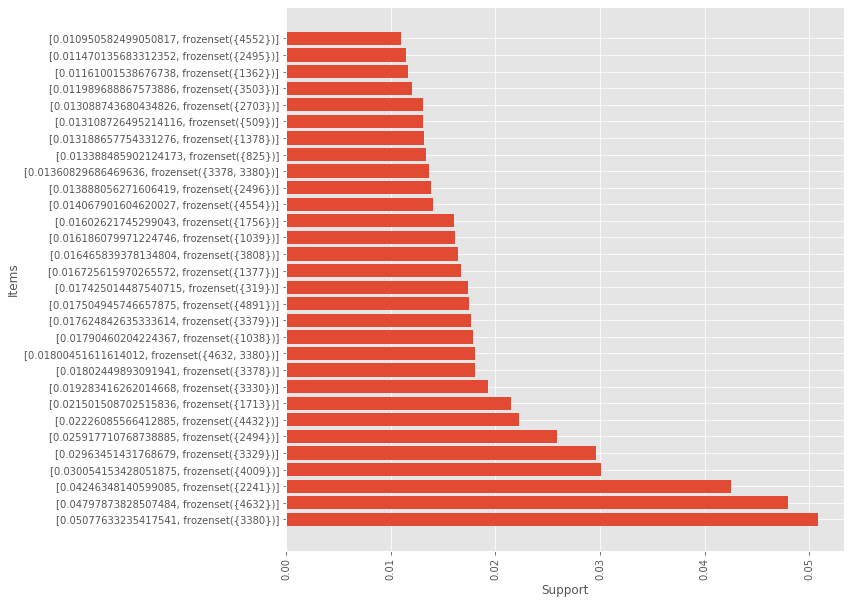

In [139]:
top_items = frequent_itemsets_fp.sort_values('support', ascending = False)[:30]

for i in range(len(top_items.itemsets)):
    top_items.itemsets.iloc[i] = str(list(top_items.iloc[i]))

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.barh(top_items.itemsets, top_items.support)

for label in ax.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.xlabel("Support")
plt.ylabel("Items")

In [140]:
top_items


,support,itemsets
9,0.050776,"[0.05077633235417541, frozenset({3380})]"
124,0.047979,"[0.04797873828507484, frozenset({4632})]"
87,0.042463,"[0.04246348140599085, frozenset({2241})]"
71,0.030054,"[0.030054153428051875, frozenset({4009})]"
43,0.029635,"[0.02963451431768679, frozenset({3329})]"
66,0.025918,"[0.025917710768738885, frozenset({2494})]"
110,0.022261,"[0.02226085566412885, frozenset({4432})]"
12,0.021502,"[0.021501508702515836, frozenset({1713})]"
16,0.019283,"[0.019283416262014668, frozenset({3330})]"
91,0.018024,"[0.01802449893091941, frozenset({3378})]"


In [141]:
frequent_itemsets_fp

,support,itemsets
0,0.008792,(3999)
1,0.016186,(1039)
2,0.004816,(826)
3,0.004076,(304)
4,0.006015,(3568)
...,...,...
217,0.004136,"(4842, 4465, 4466, 4468, 4469)"
218,0.004136,"(4842, 4465, 4467, 4468, 4469)"
219,0.004136,"(4842, 4465, 4466, 4467, 4468)"
220,0.004136,"(4842, 4465, 4466, 4467, 4469)"


In [216]:
rules = association_rules(frequent_itemsets_fp, metric = 'confidence', min_threshold = 0.8)
rules = rules [ (rules['lift']>= 60)]
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(4465, 4466)",(4467),0.006255,0.009192,0.005635,0.900958,98.014488,0.005578,10.003964
1,"(4465, 4467)",(4466),0.006355,0.008633,0.005635,0.886792,102.726284,0.005580,8.757079
2,"(4466, 4467)",(4465),0.005915,0.009712,0.005635,0.952703,98.098974,0.005578,20.937525
3,(4468),(4465),0.007713,0.009712,0.006235,0.808290,83.228939,0.006160,5.165558
4,(4468),(4467),0.007713,0.009192,0.006215,0.805699,87.651346,0.006144,5.099358
...,...,...,...,...,...,...,...,...,...
313,"(4842, 4466)","(4465, 4467, 4468, 4469)",0.004136,0.005315,0.004136,1.000000,188.131579,0.004114,inf
314,"(4842, 4467)","(4465, 4466, 4468, 4469)",0.004136,0.005275,0.004136,1.000000,189.556818,0.004115,inf
315,"(4842, 4468)","(4465, 4466, 4467, 4469)",0.004136,0.005255,0.004136,1.000000,190.277567,0.004115,inf
316,"(4842, 4469)","(4465, 4466, 4467, 4468)",0.004136,0.005515,0.004136,1.000000,181.315217,0.004114,inf


In [217]:
top_rules = rules.sort_values('support', ascending = False)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(4468),(4465),0.007713,0.009712,0.006235,0.808290,83.228939,0.006160,5.165558
4,(4468),(4467),0.007713,0.009192,0.006215,0.805699,87.651346,0.006144,5.099358
5,"(4465, 4467)",(4468),0.006355,0.007713,0.005775,0.908805,117.822099,0.005726,10.880936
6,"(4465, 4468)",(4467),0.006235,0.009192,0.005775,0.926282,100.769419,0.005718,13.440525
7,"(4467, 4468)",(4465),0.006215,0.009712,0.005775,0.929260,95.685145,0.005715,13.999076
...,...,...,...,...,...,...,...,...,...
179,"(4842, 4467, 4468)",(4465),0.004136,0.009712,0.004136,1.000000,102.969136,0.004096,inf
180,"(4465, 4842)","(4467, 4468)",0.004136,0.006215,0.004136,1.000000,160.909968,0.004111,inf
181,"(4842, 4467)","(4465, 4468)",0.004136,0.006235,0.004136,1.000000,160.394231,0.004111,inf
182,"(4842, 4468)","(4465, 4467)",0.004136,0.006355,0.004136,1.000000,157.367925,0.004110,inf


The set of items are either referred by **ANTECEDENTS** or **CONSEQUENTS**. The probability that the **ANTECEDENT EVENT** will occur is called the **SUPPORT** of the rule where as the probability that a customer will purchase a **CONSEQUENT** on the condition of purchasing an **ANTECEDENT** is referred to as the **CONFIDENCE** of the rule.

In [218]:
#Rules which have the best support values in decreasing order.It will help us to find the best antecedents and then later the best recommendation to the client depending on the support and confidence value
top_rules_1 = top_rules[['antecedents', 'consequents','support','confidence','lift']]
top_rules_1

,antecedents,consequents,support,confidence,lift
3,(4468),(4465),0.006235,0.808290,83.228939
4,(4468),(4467),0.006215,0.805699,87.651346
5,"(4465, 4467)",(4468),0.005775,0.908805,117.822099
6,"(4465, 4468)",(4467),0.005775,0.926282,100.769419
7,"(4467, 4468)",(4465),0.005775,0.929260,95.685145
...,...,...,...,...,...
179,"(4842, 4467, 4468)",(4465),0.004136,1.000000,102.969136
180,"(4465, 4842)","(4467, 4468)",0.004136,1.000000,160.909968
181,"(4842, 4467)","(4465, 4468)",0.004136,1.000000,160.394231
182,"(4842, 4468)","(4465, 4467)",0.004136,1.000000,157.367925


Now we filter the frequent itemset with only one item:

In [219]:
#frequent_itemsets_1 = fpgrowth(df_set, min_support = 0.005, use_colnames=True)
frequent_itemsets_fp['length'] = frequent_itemsets_fp['itemsets'].apply(lambda x: len(x))
frequent_itemsets_fp

,support,itemsets,length
0,0.008792,(3999),1
1,0.016186,(1039),1
2,0.004816,(826),1
3,0.004076,(304),1
4,0.006015,(3568),1
...,...,...,...
217,0.004136,"(4842, 4465, 4466, 4468, 4469)",5
218,0.004136,"(4842, 4465, 4467, 4468, 4469)",5
219,0.004136,"(4842, 4465, 4466, 4467, 4468)",5
220,0.004136,"(4842, 4465, 4466, 4467, 4469)",5


In [220]:
itemset1= frequent_itemsets_fp[(frequent_itemsets_fp['length'] ==1) & (frequent_itemsets_fp['support'] >= 0.01) ]

In [221]:
# getting the item sets with length = 2 and support more han 0.5%

itemset2 = frequent_itemsets_fp[(frequent_itemsets_fp['length'] == 2) & (frequent_itemsets_fp['support'] >= 0.004) ]
itemset2.sort_values('support',ascending=False)

,support,itemsets,length
189,0.018005,"(4632, 3380)",2
158,0.013608,"(3378, 3380)",2
150,0.009132,"(4632, 3329)",2
137,0.008972,"(3379, 3380)",2
142,0.007653,"(4632, 1713)",2
149,0.007514,"(3329, 3380)",2
140,0.007454,"(1713, 3380)",2
190,0.006774,"(4588, 3380)",2
164,0.006355,"(4465, 4467)",2
160,0.006255,"(4465, 4466)",2


In [204]:
# getting the item sets with length = 2 and support more han 1%

itemset_2= frequent_itemsets_fp[(frequent_itemsets_fp['length'] == 2) & (frequent_itemsets_fp['support'] >= 0.008) ]
itemset_2.sort_values('support',ascending=False)

,support,itemsets,length
189,0.018005,"(4632, 3380)",2
158,0.013608,"(3378, 3380)",2
150,0.009132,"(4632, 3329)",2
137,0.008972,"(3379, 3380)",2


In [203]:
# getting the item sets with length = 3 and support more han 0.3%

itemset3= frequent_itemsets_fp[ (frequent_itemsets_fp['length'] == 3) &
                   (frequent_itemsets_fp['support'] >= 0.005) ]
itemset3.sort_values('support',ascending=False)

,support,itemsets,length
169,0.005775,"(4465, 4467, 4468)",3
170,0.005775,"(4465, 4466, 4468)",3
183,0.005675,"(4465, 4467, 4469)",3
162,0.005635,"(4465, 4466, 4467)",3
171,0.005615,"(4466, 4467, 4468)",3
184,0.005515,"(4465, 4466, 4469)",3
173,0.005455,"(4467, 4468, 4469)",3
174,0.005415,"(4465, 4468, 4469)",3
175,0.005395,"(4466, 4468, 4469)",3
185,0.005395,"(4466, 4467, 4469)",3


In [202]:
itemset4= frequent_itemsets_fp[(frequent_itemsets_fp['length'] == 4) & (frequent_itemsets_fp['support'] >= 0.005) ]
itemset4.sort_values('support',ascending=False)

,support,itemsets,length
172,0.005515,"(4465, 4466, 4467, 4468)",4
176,0.005315,"(4465, 4467, 4468, 4469)",4
177,0.005275,"(4465, 4466, 4468, 4469)",4
178,0.005275,"(4466, 4467, 4468, 4469)",4
186,0.005255,"(4465, 4466, 4467, 4469)",4


In [154]:
itemset5= frequent_itemsets_fp[(frequent_itemsets_fp['length'] == 5) & (frequent_itemsets_fp['support'] >= 0.005) ]
itemset5

,support,itemsets,length
179,0.005196,"(4465, 4466, 4467, 4468, 4469)",5


In [159]:
df_set1.columns = df_set.columns.map(str)
df_set1.columns
df_set2.columns = df_set.columns.map(str)
df_set2.columns

Index(['13', '16', '18', '19', '20', '21', '22', '23', '24', '25',
       ...
       '5560', '5562', '5570', '5573', '5578', '5579', '5580', '5589', '5592',
       '5600'],
      dtype='object', name='PRODUCT_ID', length=3934)

In [271]:
ant = df_set2.loc[(df_set2['1913']>0)&(df_set2['1915']>0),'2241'].sum()
ant

223.84

SyntaxError: invalid syntax (<ipython-input-230-b4aa1c75a596>, line 1)

In [250]:
toprules5=rules.sort_values('support',ascending=True)

In [256]:
toprules5.head(40)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
158,"(4842, 4468, 4469)",(4465),0.004136,0.009712,0.004136,1.0,102.969136,0.004096,inf
215,"(4842, 4467, 4468, 4469)",(4466),0.004136,0.008633,0.004136,1.0,115.840278,0.004101,inf
214,"(4842, 4468, 4469, 4466)",(4467),0.004136,0.009192,0.004136,1.0,108.789130,0.004098,inf
213,"(4842, 4467, 4469, 4466)",(4468),0.004136,0.007713,0.004136,1.0,129.645078,0.004105,inf
212,"(4842, 4467, 4468, 4466)",(4469),0.004136,0.008273,0.004136,1.0,120.876812,0.004102,inf
211,(4842),"(4465, 4466, 4467)",0.004136,0.005635,0.004136,1.0,177.457447,0.004113,inf
210,"(4842, 4467)","(4465, 4466)",0.004136,0.006255,0.004136,1.0,159.881789,0.004111,inf
209,"(4466, 4842)","(4465, 4467)",0.004136,0.006355,0.004136,1.0,157.367925,0.004110,inf
208,"(4465, 4842)","(4466, 4467)",0.004136,0.005915,0.004136,1.0,169.064189,0.004112,inf
207,"(4466, 4467, 4842)",(4465),0.004136,0.009712,0.004136,1.0,102.969136,0.004096,inf
